## **1. Dataset 구성**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import seaborn as sns

from pandas import DataFrame
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import warnings
from keras.callbacks import EarlyStopping

warnings.filterwarnings('ignore')

df = DataFrame(pd.read_csv('creditcard.csv'))

In [2]:
df.info()
# df.describe()
# df.values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### * **class 값 분석**

In [3]:
print("No Frauds", round(df["Class"].value_counts()[0]/len(df) * 100,2),
     "%of the dateset")
print("Frauds", round(df["Class"].value_counts()[1]/len(df) * 100,2),
     "%of the dateset")

No Frauds 99.83 %of the dateset
Frauds 0.17 %of the dateset


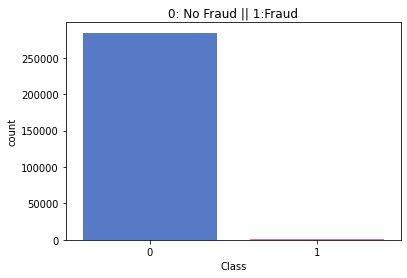

In [4]:
colors = ["#4374D9", "#F361A6"]

sns.countplot("Class", data=df, palette=colors)
plt.title("0: No Fraud || 1:Fraud")
plt.show()

In [5]:
X=df[df.columns[:-2]]
Y=df['Class']
Y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df  = df.loc[df['Class'] == 0][:492]

normal_distributed_df= pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
69924,53638.0,-1.962719,1.071781,1.029697,0.334329,-0.107834,0.463893,0.139035,0.956379,-1.083651,...,-0.141712,-0.826165,0.219348,-0.354207,-0.758257,0.334118,-0.763466,-0.266648,53.11,0
42635,41181.0,-7.334341,4.960892,-8.451410,8.174825,-7.237464,-2.382711,-11.508842,4.635798,-6.557760,...,2.153755,0.033922,-0.014095,0.625250,-0.053390,0.164709,1.411047,0.315645,11.38,1
67487,52557.0,1.469452,-1.053602,-0.355049,-1.485436,-1.064086,-0.858611,-0.597353,-0.188282,-2.237872,...,-0.135658,-0.169809,-0.150058,-0.020729,0.636579,-0.080054,-0.022975,-0.003397,50.00,0
247995,153761.0,1.146259,1.403458,-4.159148,2.660107,-0.323217,-1.836071,-1.623740,0.259562,-1.132044,...,0.564450,0.445744,-0.141136,-0.265517,0.362260,-0.416062,0.507370,0.243744,51.37,1
79883,58222.0,-1.322789,1.552768,-2.276921,2.992117,-1.947064,-0.480288,-1.362388,0.953242,-2.329629,...,0.614969,-0.195200,0.590711,-0.233378,-0.164285,-0.277498,0.428610,0.246394,270.00,1


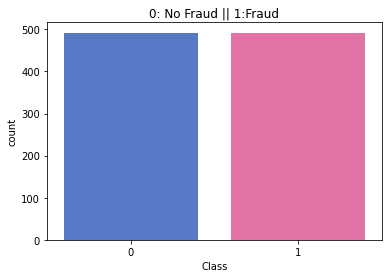

In [7]:
sns.countplot('Class', data=new_df, palette=colors)
plt.title("0: No Fraud || 1:Fraud")
plt.show()

### * **StandardScaler Amount 값 정규화**

In [8]:
dataset = df.values
amount = dataset[:,29]
amount = amount.reshape(-1, 1)

In [9]:
standardScaler = StandardScaler()
rob_scaler = RobustScaler()
amount_data_standard = standardScaler.fit(amount).transform(amount)

### * **Time 데이터 정규화 방법 분석**

In [10]:
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['loged_time'] = np.log1p(df['Time'].values.reshape(-1,1))
df['std_time'] = standardScaler.fit_transform(df['Time'].values.reshape(-1,1))

(-1.996583023457193, 1.6420577336572635)

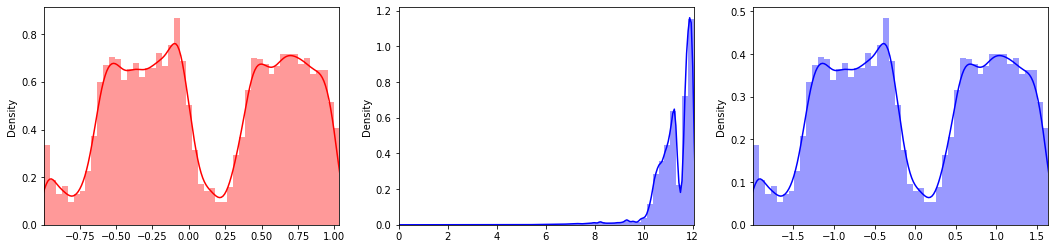

In [11]:
fig, ax = plt.subplots(1,3,figsize=(18,4))
scaled_time = df['scaled_time'].values
loged_time = df['loged_time'].values
std_time = df['std_time'].values

sns.distplot(scaled_time, ax=ax[0], color='r')
ax[0].set_xlim(min(scaled_time), max(scaled_time))

sns.distplot(loged_time, ax=ax[1], color='b')
ax[1].set_xlim(min(loged_time), max(loged_time))

sns.distplot(std_time, ax=ax[2], color='b')
ax[2].set_xlim(min(std_time), max(std_time))

### * **RobustScaler를 활용한 Time 데이터 정규화**

In [12]:
dataset = df.values
time_1 = dataset[:,0]
time_1 = time_1.reshape(-1, 1)

rob_scaler = RobustScaler()
time_data_robust = rob_scaler.fit(time_1).transform(time_1)

In [13]:
amount_data = pd.DataFrame(amount_data_standard)
time_data = pd.DataFrame(time_data_robust)
# print(type(time_data))

In [14]:
# 정규화 된 Amount data 컬럼명 normalAmount로 지정
amount_data.columns = ['normalAmount']
amount_data

,normalAmount
0,-0.349231
1,-0.339436
2,-0.349231
3,-0.304013
4,0.445588
...,...
284802,0.894173
284803,-0.328921
284804,-0.155324
284805,-0.150926


In [15]:
# 기존에 있던 Time, Amount 데이터 drop
df.drop('Time', axis=1, inplace = True)
df.drop('Amount', axis=1, inplace = True)
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Class,scaled_time,loged_time,std_time
158482,-0.509961,1.090827,-1.361781,-0.842936,4.559679,3.052514,1.611636,0.068097,0.381376,-0.084783,...,-0.758083,0.694008,1.051326,-0.255323,-0.146300,-0.315192,0,0.312774,11.620128,0.347480
107333,-0.624032,1.115134,0.800595,-0.443900,0.772354,0.032705,0.722707,-0.031866,-0.612877,0.096107,...,-0.104022,-0.811514,-0.366527,0.105179,0.085932,0.203107,0,-0.168024,11.161821,-0.514316
238055,2.021207,-0.368479,-0.785228,0.162057,-0.374861,-0.471765,-0.410046,0.003538,0.773669,0.237861,...,0.194738,-0.317253,-0.299225,0.541967,-0.063547,-0.071675,0,0.761428,11.915085,1.151661
267012,2.005532,0.007087,-3.652595,-0.203742,2.883710,3.063871,-0.407471,0.787168,0.573960,-1.042556,...,-0.008131,0.562138,0.239086,0.747061,-0.018403,-0.018055,0,0.915001,11.998907,1.426930
104952,0.902007,-0.897480,-0.761613,-0.459273,1.373463,3.668537,-0.800535,0.917612,0.337488,-0.132895,...,-0.144638,1.038317,0.240978,0.386199,-0.040639,0.053530,0,-0.180806,11.146243,-0.537227
263654,-0.057388,-0.008733,-1.466252,-1.960646,1.651592,-0.545709,0.902017,-0.187090,-1.768846,-0.219457,...,-0.328342,-0.343025,0.556545,0.073195,-0.026718,0.042346,0,0.897132,11.989507,1.394901
228928,1.933072,-0.278650,-1.801777,-0.123711,0.563853,-0.367020,0.384746,-0.231648,0.260343,-0.015228,...,0.077107,0.323483,0.085980,-0.115945,-0.067260,-0.054896,0,0.716996,11.889463,1.072020
52428,-0.459838,0.766796,1.450594,-0.103726,0.274937,0.487796,0.341511,-0.022931,-2.249213,0.738164,...,-0.313968,-0.870426,0.293893,-0.343084,-0.013985,0.067249,0,-0.461013,10.724412,-1.039479
91247,-0.791199,-3.743985,-0.083366,-0.373939,-2.324731,-0.367429,0.715956,-0.293879,1.604470,-1.729417,...,-0.930900,0.767636,0.011615,-0.020353,-0.121614,0.206936,0,-0.250402,11.056888,-0.661974
209603,0.770337,0.292243,-1.012265,0.189370,-0.709058,0.671068,0.985077,-0.233183,0.657131,-0.793229,...,0.588887,0.033464,-1.701443,0.439853,0.129934,0.052977,0,0.621988,11.832368,0.901724


In [16]:
# 정규화된 Time,Amount data 삽입
df.insert(0,'normalTime',time_data)
df.insert(29,'normalAmount',amount_data)
df.head(10)

,normalTime,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,normalAmount,Class,scaled_time,loged_time,std_time
158482,0.571717,-0.509961,1.090827,-1.361781,-0.842936,4.559679,3.052514,1.611636,0.068097,0.381376,...,0.694008,1.051326,-0.255323,-0.146300,-0.315192,-0.065367,0,0.312774,11.620128,0.347480
107333,0.538176,-0.624032,1.115134,0.800595,-0.443900,0.772354,0.032705,0.722707,-0.031866,-0.612877,...,-0.811514,-0.366527,0.105179,0.085932,0.203107,-0.130256,0,-0.168024,11.161821,-0.514316
238055,0.715058,2.021207,-0.368479,-0.785228,0.162057,-0.374861,-0.471765,-0.410046,0.003538,0.773669,...,-0.317253,-0.299225,0.541967,-0.063547,-0.071675,0.512716,0,0.761428,11.915085,1.151661
267012,0.764906,2.005532,0.007087,-3.652595,-0.203742,2.883710,3.063871,-0.407471,0.787168,0.573960,...,0.562138,0.239086,0.747061,-0.018403,-0.018055,-0.297256,0,0.915001,11.998907,1.426930
104952,-0.237374,0.902007,-0.897480,-0.761613,-0.459273,1.373463,3.668537,-0.800535,0.917612,0.337488,...,1.038317,0.240978,0.386199,-0.040639,0.053530,0.026589,0,-0.180806,11.146243,-0.537227
263654,-0.258509,-0.057388,-0.008733,-1.466252,-1.960646,1.651592,-0.545709,0.902017,-0.187090,-1.768846,...,-0.343025,0.556545,0.073195,-0.026718,0.042346,-0.313289,0,0.897132,11.989507,1.394901
228928,-0.064933,1.933072,-0.278650,-1.801777,-0.123711,0.563853,-0.367020,0.384746,-0.231648,0.260343,...,0.323483,0.085980,-0.115945,-0.067260,-0.054896,-0.229289,0,0.716996,11.889463,1.072020
52428,0.778686,-0.459838,0.766796,1.450594,-0.103726,0.274937,0.487796,0.341511,-0.022931,-2.249213,...,-0.870426,0.293893,-0.343084,-0.013985,0.067249,-0.296696,0,-0.461013,10.724412,-1.039479
91247,0.475076,-0.791199,-3.743985,-0.083366,-0.373939,-2.324731,-0.367429,0.715956,-0.293879,1.604470,...,0.767636,0.011615,-0.020353,-0.121614,0.206936,-0.325283,0,-0.250402,11.056888,-0.661974
209603,0.481361,0.770337,0.292243,-1.012265,0.189370,-0.709058,0.671068,0.985077,-0.233183,0.657131,...,0.033464,-1.701443,0.439853,0.129934,0.052977,-0.299775,0,0.621988,11.832368,0.901724


----

## 3. Class를 종속변수 사용

In [17]:
np.random.seed(3)
tf.random.set_seed(3)

X = df.values[:,0:30]
Y = df.values[:,30]

## 4. Train Set : Test set = 85:15

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.15, random_state=42)

## 5. ANN/DNN활용

In [23]:
model = Sequential()

model.add(Dense(30, input_dim=30, activation='sigmoid'))
model.add(Dense(18, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# 모델 저장 방법
model_path='./model/{epoch:02d}-{val_loss:.4f},hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)

# 학습 조기 종료
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)
history = model.fit(X_train, Y_train, validation_split=0.15, epochs = 50, batch_size = 100, callbacks=[early_stopping_callback,checkpointer])
print("\nAccuracy : %.4f" % (model.evaluate(X_test, Y_test, verbose = 0)[1]))

Epoch 1/50
2058/2058 [==============================] - 2s 707us/step - loss: 0.0305 - accuracy: 0.9990 - val_loss: 0.0029 - val_accuracy: 0.9994

Epoch 00001: val_loss improved from inf to 0.00286, saving model to ./model\01-0.0029,hdf5
INFO:tensorflow:Assets written to: ./model\01-0.0029,hdf5\assets
Epoch 2/50
2058/2058 [==============================] - 1s 656us/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0027 - val_accuracy: 0.9994

Epoch 00002: val_loss improved from 0.00286 to 0.00274, saving model to ./model\02-0.0027,hdf5
INFO:tensorflow:Assets written to: ./model\02-0.0027,hdf5\assets
Epoch 3/50
2058/2058 [==============================] - 1s 659us/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0026 - val_accuracy: 0.9994

Epoch 00003: val_loss improved from 0.00274 to 0.00264, saving model to ./model\03-0.0026,hdf5
INFO:tensorflow:Assets written to: ./model\03-0.0026,hdf5\assets
Epoch 4/50
2058/2058 [==============================] - 1s 667us/step - loss: 0.002

2058/2058 [==============================] - 1s 654us/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0032 - val_accuracy: 0.9994

Epoch 00038: val_loss did not improve from 0.00229
Epoch 39/50
2058/2058 [==============================] - 1s 633us/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0030 - val_accuracy: 0.9995

Epoch 00039: val_loss did not improve from 0.00229
Epoch 40/50
2058/2058 [==============================] - 1s 628us/step - loss: 9.6886e-04 - accuracy: 0.9998 - val_loss: 0.0033 - val_accuracy: 0.9994

Epoch 00040: val_loss did not improve from 0.00229
Epoch 41/50
2058/2058 [==============================] - 1s 631us/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0033 - val_accuracy: 0.9994

Epoch 00041: val_loss did not improve from 0.00229
Epoch 42/50
2058/2058 [==============================] - 1s 641us/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0032 - val_accuracy: 0.9995

Epoch 00042: val_loss did not improve from 0.00229
Epoch 43/50
2

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_11 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_12 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 1,743
Trainable params: 1,743
Non-trainable params: 0
_________________________________________________________________


In [55]:
history.history
# 딕셔너리 형태
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [56]:
y_value = history.history['val_loss']  # 오차값을 저장
y_acc = history.history['accuracy']    # 정밀도를 저장

print(len(y_value))
print(len(y_acc))

150
150


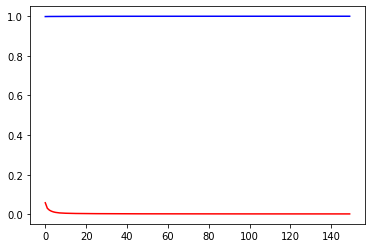

In [57]:
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_value, c='red', markersize=3)
plt.plot(x_len, y_acc, c='blue', markersize=3)

In [58]:
y = model.predict(X_train)
print(y)

[[6.5958433e-05]
 [3.1561845e-05]
 [2.9349327e-04]
 ...
 [1.7681718e-04]
 [9.5921755e-04]
 [9.7775459e-04]]
